In [4]:
%load_ext autoreload
%autoreload 2
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import analysis.player_scores as player_scores
import data_extraction.get_indices as get_indices
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import parse_data.identify_filepaths as identify_filepaths 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Getting proportion of score by each player in each session

In [ ]:
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files'
json_filenames_social, json_filenames_first_solo, json_filenames_second_solo = identify_filepaths.get_all_relative_paths(data_folder=data_folder)
json_filenames_both_solos = [session for pair in zip(json_filenames_first_solo, json_filenames_second_solo) for session in pair]


TypeError: get_relative_paths() missing 1 required positional argument: 'match_string'

In [11]:
data_folder = data_strings.DATA_FOLDER
json_filenames_social, json_filenames_solo = identify_filepaths.get_filenames(data_folder=data_folder)
test = identify_filepaths.get_relative_paths('Solo', data_folder=data_folder)

In [10]:
json_filenames = json_filenames_social[-8:]

In [12]:
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)

IntProgress(value=0, max=8)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250404_1\2025-04-04_10-31-29_JW04_JI04_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250410_1\2025-04-10_12-29-00_AR10_MY10_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250411_1\2025-04-11_09-29-35_IN11_CW11_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250421_1\2025-04-21_09-29-53_NM21_KC21_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250421_2\2025-04-21_10-29-08_LM21_LC21_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\pseudonymised_json_files\250502_1\2025-05-02_11-21-38_JC02_KS02_Social.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom

In [13]:
proportion_score_array = player_scores.proportion_score_sessions_df(trial_lists)

In [14]:
9 + 9 + 22

40

In [15]:
np.sum(proportion_score_array * 22 + 9, axis=1)

array([40., 40., 40., 40., 40., 40., 40., 40.])

In [16]:
proportion_score_array = proportion_score_array[1:]

In [17]:
proportion_score_array[:]

array([[0.77429984, 0.22570016],
       [0.37735849, 0.62264151],
       [0.30260521, 0.69739479],
       [0.39761431, 0.60238569],
       [0.54017094, 0.45982906],
       [0.38129496, 0.61870504],
       [0.43430657, 0.56569343]])

In [8]:
proportion_wins_player_0_array = np.zeros(len(trial_lists))
for i in range(len(trial_lists)):
    trial_list = trial_lists[i]
    winners = get_indices.get_trigger_activators(trial_list)
    proportion_wins_player_0 = np.sum(winners == 0)/winners.size
    proportion_wins_player_0_array[i] = proportion_wins_player_0

In [9]:
proportion_wins_array = player_scores.proportion_wins_sessions(trial_lists)

In [10]:
proportion_wins_array

array([[0.42635659, 0.57364341],
       [0.38461538, 0.61538462],
       [0.3963964 , 0.6036036 ],
       [0.34659091, 0.65340909],
       [0.42574257, 0.57425743],
       [0.7295082 , 0.2704918 ],
       [0.51754386, 0.48245614],
       [0.37313433, 0.62686567],
       [0.33043478, 0.66956522],
       [0.76      , 0.24      ],
       [0.29931973, 0.70068027],
       [0.33098592, 0.66901408],
       [0.7029703 , 0.2970297 ],
       [0.53333333, 0.46666667],
       [0.43165468, 0.56834532],
       [0.51851852, 0.48148148],
       [0.47887324, 0.52112676],
       [0.37984496, 0.62015504],
       [0.23741007, 0.76258993]])

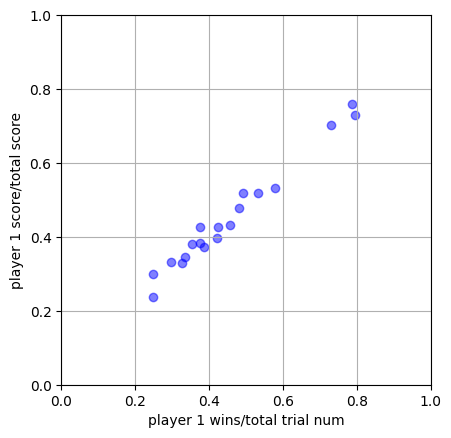

In [11]:
for i in range(len(trial_lists)):
    plt.scatter(proportion_score_array[i,0], proportion_wins_array[i,0], color='blue', alpha=0.5)



plt.gca().set_aspect(1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('player 1 wins/total trial num')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()

In [12]:
probability_low_when_first_visible, _, _ = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists)
ratio_probability_low_when_first_visible = probability_low_when_first_visible[:,0]/probability_low_when_first_visible[:,1]

trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 8.0
 this_player_this_tria

In [13]:
probability_low_when_first_visible

array([[0.71428571, 0.76190476],
       [1.        , 0.42857143],
       [0.6       , 0.875     ],
       [0.78947368, 0.65517241],
       [0.85714286, 0.81818182],
       [0.6       , 0.90909091],
       [0.61904762, 0.41666667],
       [0.58823529, 0.69230769],
       [1.        , 0.9       ],
       [0.46428571, 1.        ],
       [1.        , 0.27272727],
       [1.        , 0.46153846],
       [0.58333333, 0.72727273],
       [0.23076923, 1.        ],
       [0.85714286, 0.82758621],
       [0.6       , 0.70588235],
       [0.70588235, 0.33333333],
       [0.77777778, 0.27272727],
       [0.625     , 0.23809524]])

In [14]:
ratio_probability_low_when_first_visible

array([0.9375    , 2.33333333, 0.68571429, 1.20498615, 1.04761905,
       0.66      , 1.48571429, 0.8496732 , 1.11111111, 0.46428571,
       3.66666667, 2.16666667, 0.80208333, 0.23076923, 1.03571429,
       0.85      , 2.11764706, 2.85185185, 2.625     ])

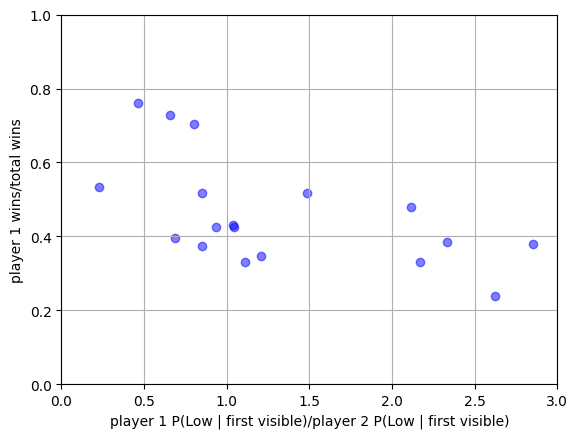

In [15]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_wins_array[:,0], color='blue', alpha=0.5)




plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 wins/total wins')
plt.grid(True)
plt.show()

In [16]:
ratio_probability_low_when_first_visible.size, proportion_score_array.shape[0]

(19, 19)

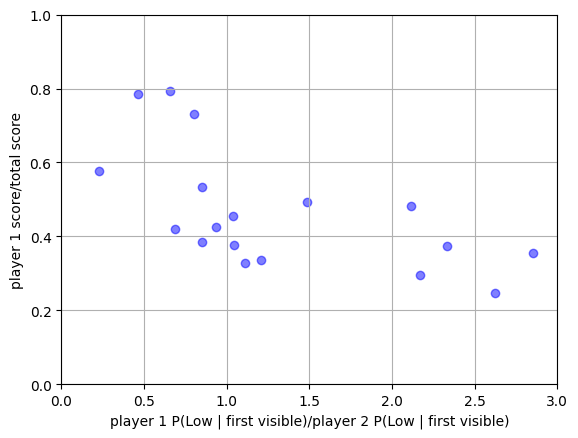

In [17]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_score_array[:,0], color='blue', alpha=0.5)


plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()